<a href="https://colab.research.google.com/github/wanlichen2024/gdda612_project1/blob/main/Copy_of_708Assessment_partC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import seaborn as sns
from scipy.stats import skew, kurtosis
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [74]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/marketing_campaign.csv', delimiter='\t')

In [75]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [76]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [77]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [78]:
# New data frame
df1 = df[['ID','Income', 'Kidhome', 'MntWines','MntMeatProducts', 'NumWebPurchases', 'NumStorePurchases']]
df=df1

In [79]:
df.shape

(2240, 7)

In [80]:
np.random.seed(42)

total_elements = df.size

# 计算需要设置为缺失值的元素数量
num_missing = int(total_elements * 0.001)

# 随机选择要设置为缺失值的元素的位置
missing_positions = np.random.choice(total_elements, num_missing, replace=False)

# 将数据框展平为一维数组，以便于索引
flattened_df = df.values.flatten()

# 将选定的位置设置为 NaN
flattened_df[missing_positions] = np.nan

# 将数据重新整形为原来的形状
df_with_missing = pd.DataFrame(flattened_df.reshape(df.shape), columns=df.columns)

# 查看结果
print(df_with_missing.isna().sum())

ID                    5
Income               26
Kidhome               2
MntWines              0
MntMeatProducts       1
NumWebPurchases       1
NumStorePurchases     4
dtype: int64


In [81]:
df=df_with_missing

In [82]:
# check missing value
df.isna().sum()

ID                    5
Income               26
Kidhome               2
MntWines              0
MntMeatProducts       1
NumWebPurchases       1
NumStorePurchases     4
dtype: int64

In [83]:
# Deal with missing value
#1. Using median to fill missing value
df['Income'].fillna(df['Income'].median(),inplace=True)
df['Kidhome'].fillna(df['Kidhome'].median(),inplace=True)
df['MntWines'].fillna(df['MntWines'].median(),inplace=True)
df['MntMeatProducts'].fillna(df['MntMeatProducts'].median(),inplace=True)
df['NumWebPurchases'].fillna(df['NumWebPurchases'].median(),inplace=True)
df['NumStorePurchases'].fillna(df['NumStorePurchases'].median(),inplace=True)



In [84]:
#2. Drop Missing value with missing values in the 'ID' and 'Z_Revenue' columns
df.dropna(subset=['ID'], inplace=True)

In [85]:
df.isna().sum()

ID                   0
Income               0
Kidhome              0
MntWines             0
MntMeatProducts      0
NumWebPurchases      0
NumStorePurchases    0
dtype: int64

In [86]:
df.dtypes

ID                   float64
Income               float64
Kidhome              float64
MntWines             float64
MntMeatProducts      float64
NumWebPurchases      float64
NumStorePurchases    float64
dtype: object

In [87]:
df.shape

(2235, 7)

In [88]:
#change data type
df['ID']=df['ID'].astype('string')

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2235 entries, 0 to 2239
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2235 non-null   string 
 1   Income             2235 non-null   float64
 2   Kidhome            2235 non-null   float64
 3   MntWines           2235 non-null   float64
 4   MntMeatProducts    2235 non-null   float64
 5   NumWebPurchases    2235 non-null   float64
 6   NumStorePurchases  2235 non-null   float64
dtypes: float64(6), string(1)
memory usage: 139.7 KB


In [90]:
# Separate df into numerical_df and categorical_df
numerical_df = df[['Income','Kidhome','MntWines','MntMeatProducts','NumWebPurchases','NumStorePurchases']]



In [91]:
numerical_df.shape

(2235, 6)

In [92]:
# deal with outliner
numerical_df_outliner=numerical_df.copy()
Q1=numerical_df_outliner.quantile(0.25)
Q3=numerical_df_outliner.quantile(0.75)
IQR=Q3-Q1

outliners=(numerical_df_outliner < (Q1 - 1.5 * IQR)) | (numerical_df_outliner > (Q3 + 1.5 * IQR))

# Replace outliers with median
for col in numerical_df_outliner.columns:
    median = numerical_df_outliner[col].median()
    numerical_df_outliner[col][outliners[col]] = median


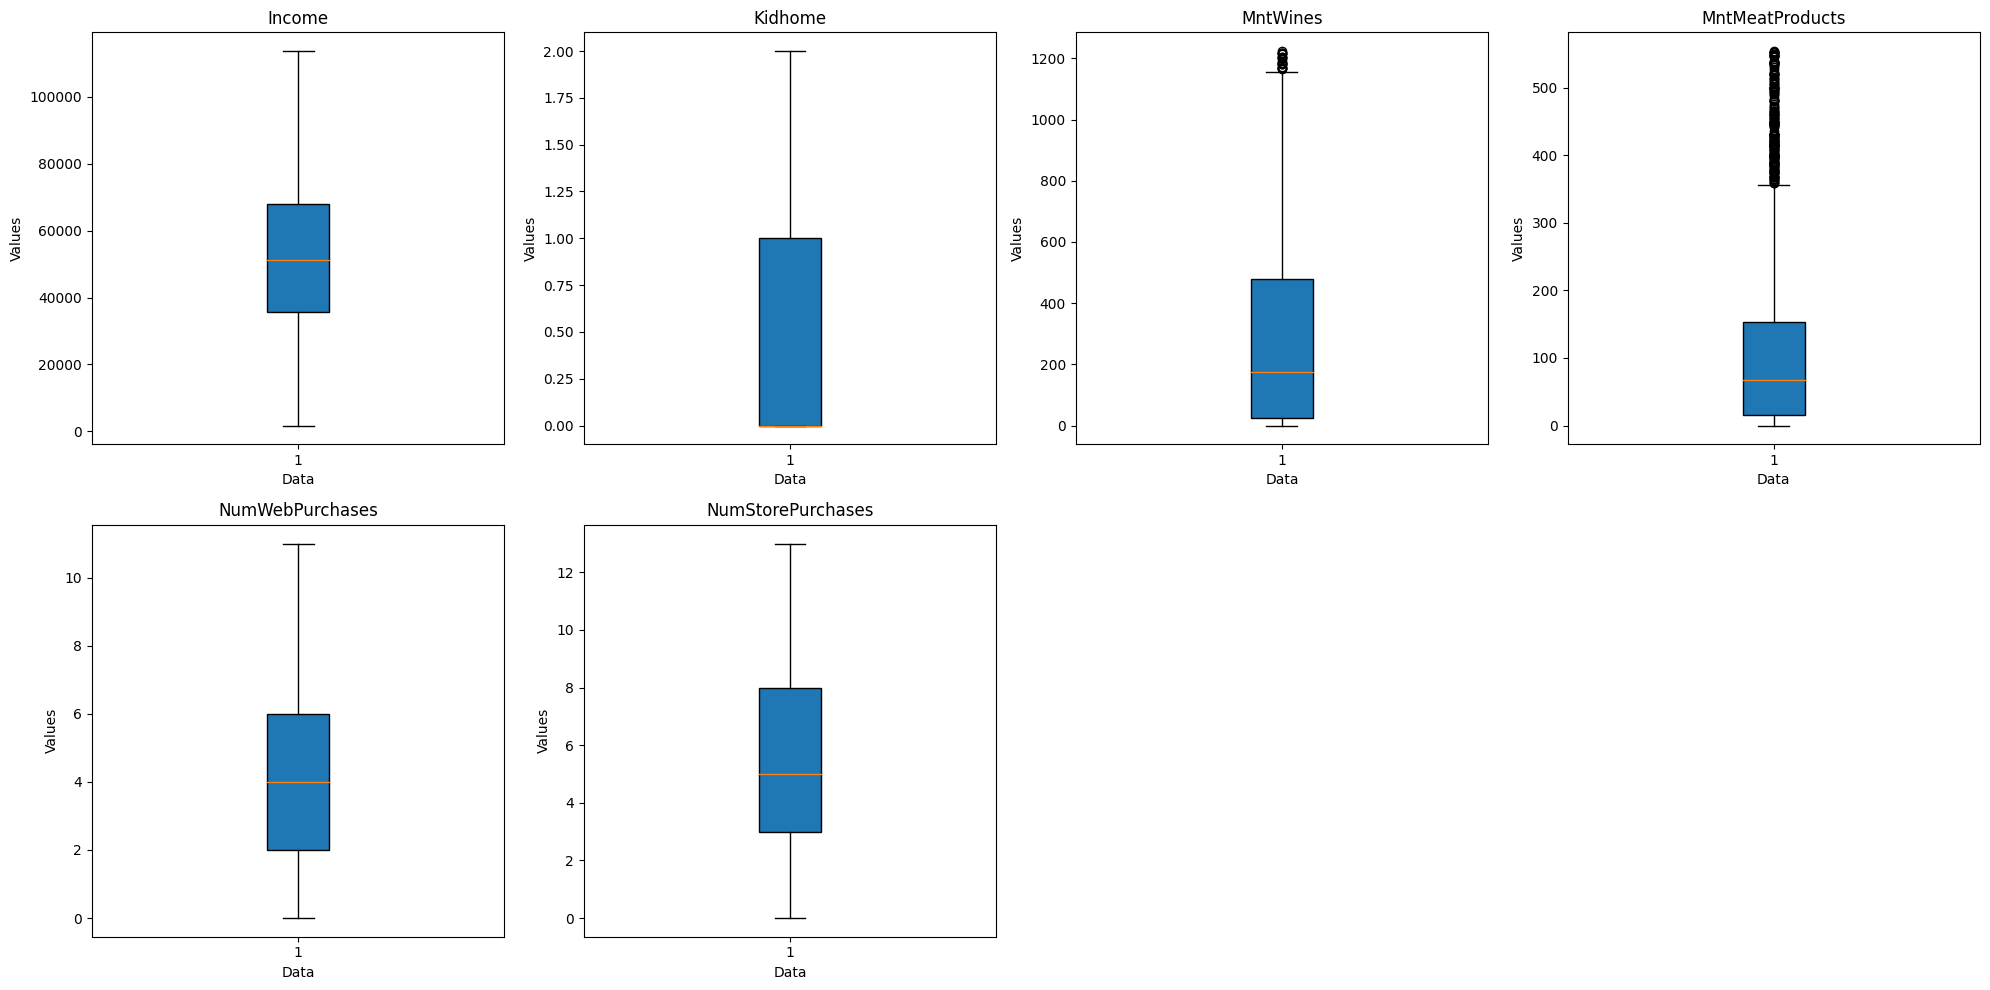

In [93]:
num_cols = len(numerical_df_outliner.columns)
num_rows = math.ceil(num_cols / 4)

plt.figure(figsize=(20, 10))


for i, col in enumerate(numerical_df_outliner.columns):
    plt.subplot(num_rows, 4, i+1)
    plt.boxplot(numerical_df_outliner[col], patch_artist=True)
    plt.title(col)
    plt.xlabel('Data')
    plt.ylabel('Values')

plt.tight_layout()
plt.show()



In [94]:
numerical_df=numerical_df_outliner

In [95]:
# Data exploration technique
#1. Descriptive statiatic
numerical_df.describe()

,Income,Kidhome,MntWines,MntMeatProducts,NumWebPurchases,NumStorePurchases
count,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000
mean,51618.989709,0.444295,285.514541,112.514094,4.049217,5.787919
std,20524.122211,0.538498,309.984181,134.667790,2.625250,3.244958
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35533.500000,0.000000,24.000000,16.000000,2.000000,3.000000
50%,51381.500000,0.000000,174.000000,67.000000,4.000000,5.000000
75%,68001.500000,1.000000,479.000000,152.500000,6.000000,8.000000
max,113734.000000,2.000000,1224.000000,554.000000,11.000000,13.000000


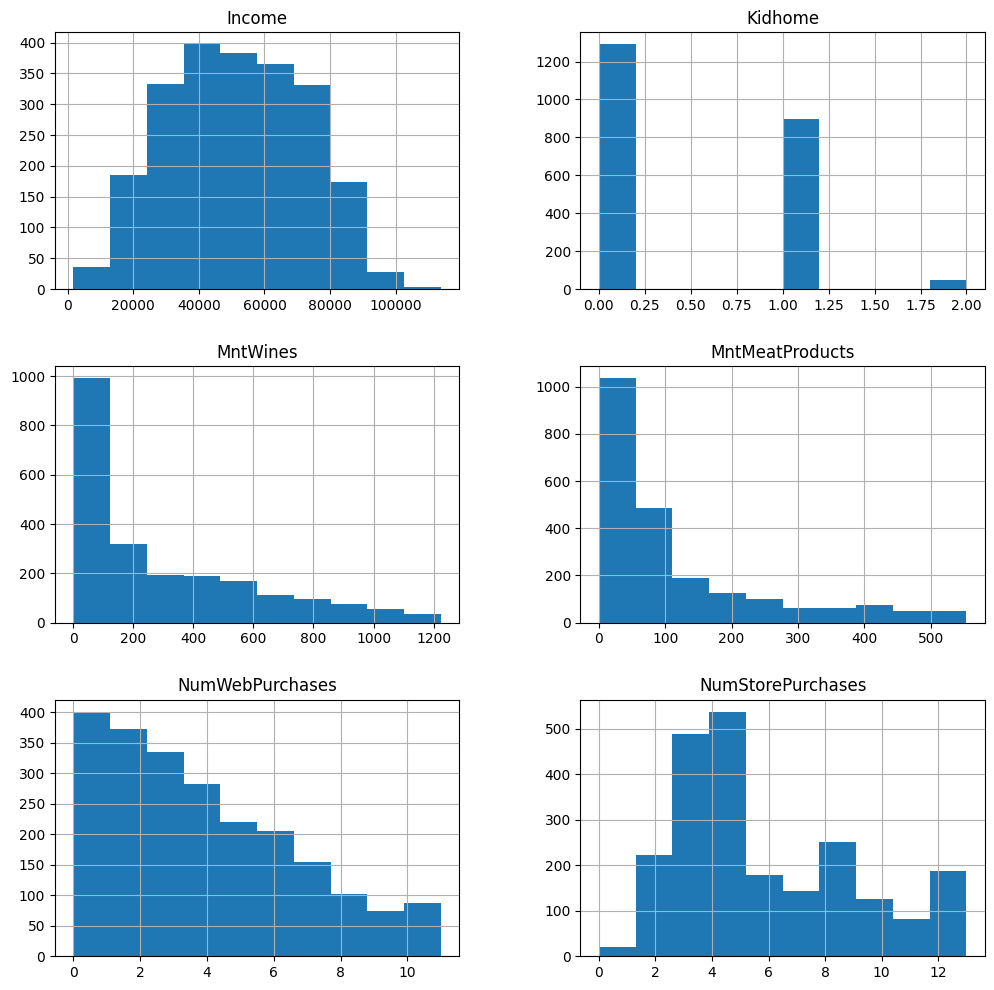

In [96]:
#numerical data visualisation
numerical_df.hist(figsize=(12, 12))
plt.show()

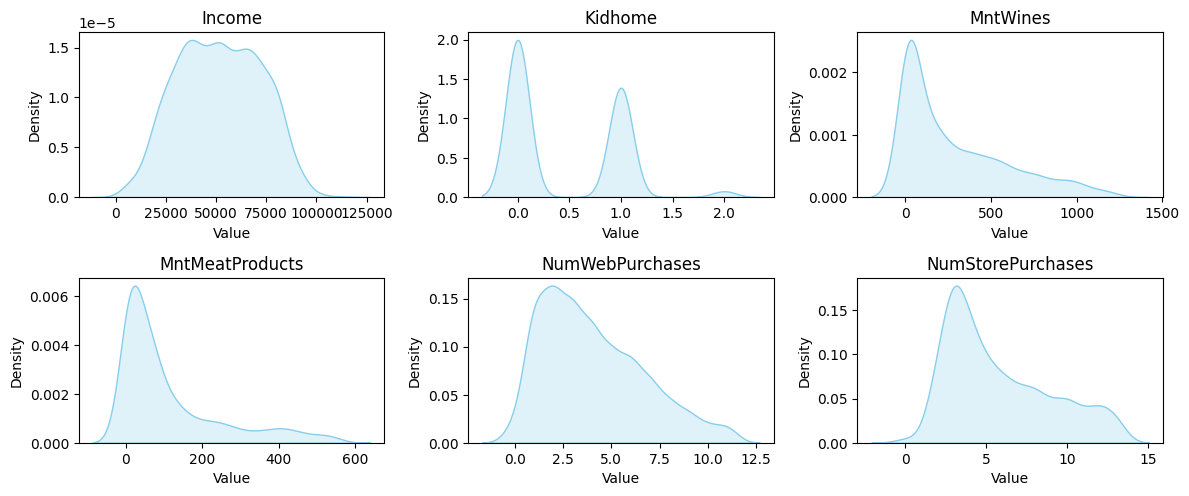

In [97]:
# KDE plot
plt.figure(figsize=(12, 12))
for i, col in enumerate(numerical_df.columns):
    plt.subplot(5, 3, i + 1)
    sns.kdeplot(data=numerical_df[col], fill=True, color='skyblue')
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Density')
plt.tight_layout()
plt.show()



In [98]:
# Calculate skewness and kurtosis
skewness = {}
kurtosis_val = {}

for col in numerical_df.columns:
    skewness[col] = skew(numerical_df[col])
    kurtosis_val[col] = kurtosis(numerical_df[col])

for col, skew_val in skewness.items():
    print(f'Skewness of {col}: {skew_val}')

for col, kurtosis_val in kurtosis_val.items():
    print(f'Kurtosis of {col}: {kurtosis_val}')


Skewness of Income: 0.013182870645883917
Skewness of Kidhome: 0.6351496110182536
Skewness of MntWines: 1.0788514843723294
Skewness of MntMeatProducts: 1.5586722543499407
Skewness of NumWebPurchases: 0.6964074819257807
Skewness of NumStorePurchases: 0.706722090256363
Kurtosis of Income: -0.8232722943291875
Kurtosis of Kidhome: -0.7793802727125985
Kurtosis of MntWines: 0.1725079762255608
Kurtosis of MntMeatProducts: 1.5064995023609207
Kurtosis of NumWebPurchases: -0.2509463150792999
Kurtosis of NumStorePurchases: -0.6162403295780274


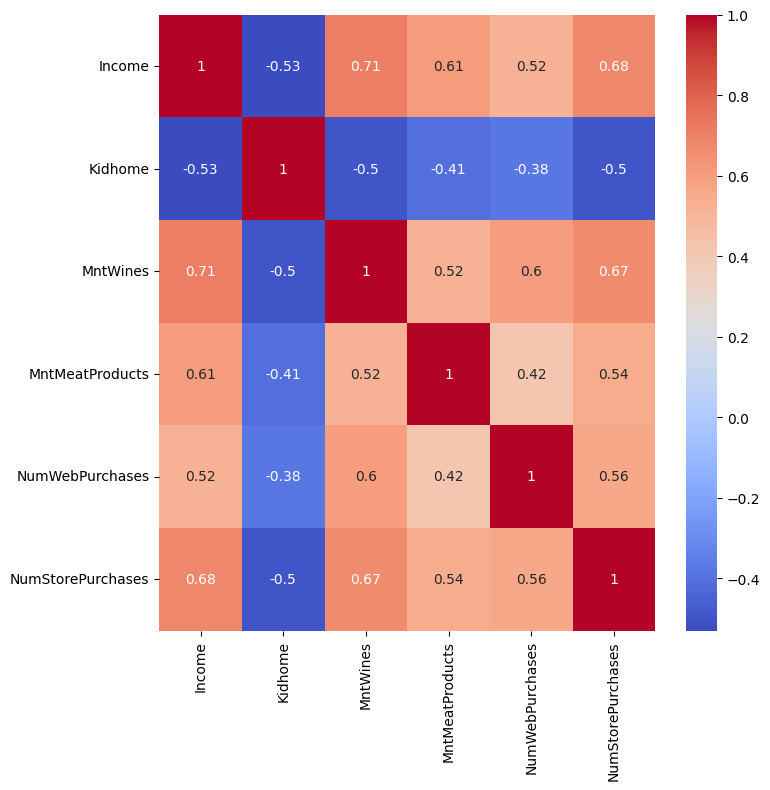

In [99]:
#correlation heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(numerical_df.corr().round(2), annot=True, cmap='coolwarm')
plt.show()

In [100]:
#preprocess data
features = numerical_df.columns.tolist()
scaler = StandardScaler()
df_scaled = scaler.fit_transform(numerical_df[features])

In [101]:
df_scaled=pd.DataFrame(df_scaled,columns=features)

In [102]:
df_scaled.head()

,Income,Kidhome,MntWines,MntMeatProducts,NumWebPurchases,NumStorePurchases
0,0.317698,-0.825249,1.127682,3.219648,1.505254,-0.551107
1,-0.257072,1.032185,-0.885774,-0.791117,-1.161756,-1.167586
2,0.974389,-0.825249,0.453303,0.107592,1.505254,1.298329
3,-1.217035,1.032185,-0.885774,-0.687134,-0.780755,-0.551107
4,0.325252,1.032185,-0.363050,0.040746,0.362250,0.065372


In [103]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import numpy as np


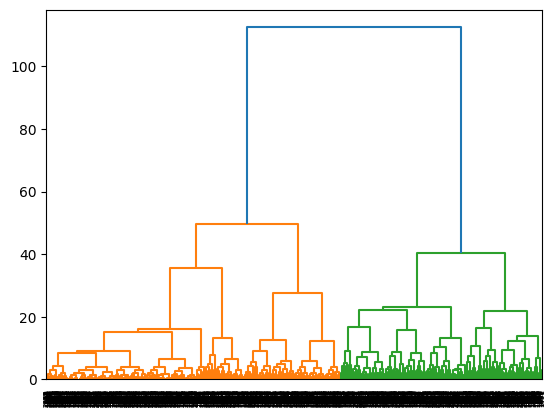

In [104]:
#Hierarchy
# hierachy cluster
link=linkage(df_scaled,method='ward')
dendrogram(link,orientation='top',distance_sort='descending',show_leaf_counts=True)
plt.show()

max_d=5
h_clusters=fcluster(link,max_d,criterion='distance')


In [105]:
print("Cluster labels",h_clusters)

Cluster labels [15 55 22 ... 24 34 55]


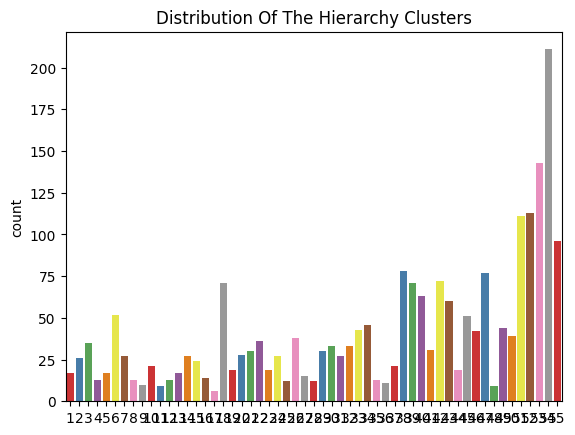

In [106]:
pal = sns.color_palette("Set1", len(set(h_clusters)))
HClustersCt = sns.countplot(x=h_clusters, palette= pal)
HClustersCt.set_title("Distribution Of The Hierarchy Clusters")
plt.show()

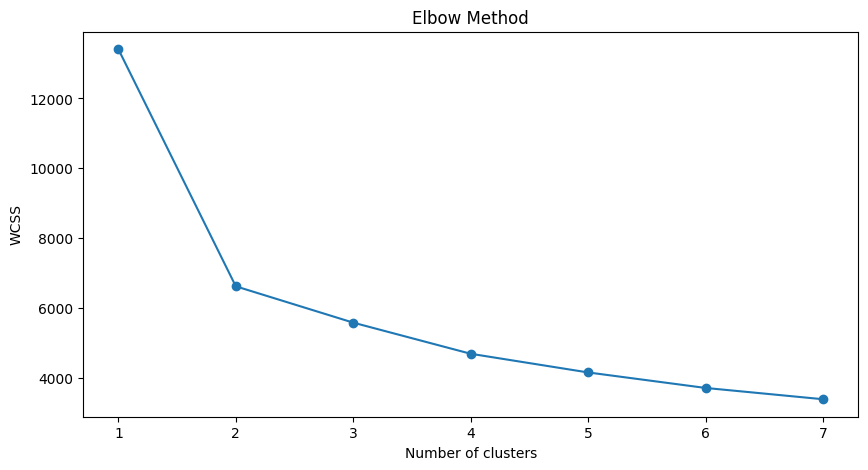

In [107]:

#K means
# initiate
wcss = []

# caculate wcss from range 1 to 8
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, 8), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


cluster number 2 is an optimal number

In [108]:
# Identify the best number of clusters from Elbow Method
n_clusters = 2

# Apply clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(df_scaled)

# Set Unique clusters,
unique_clusters = set(cluster_labels)
print(f"Unique clusters: {unique_clusters}")

# ensure multiple cluster
if len(unique_clusters) > 1:
    # caculate silhouette
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    sample_silhouette_values = silhouette_samples(df_scaled, cluster_labels)
    print(f"Average silhouette score: {silhouette_avg}")


Unique clusters: {0, 1}
Average silhouette score: 0.4420068090050079


Silhouette score for 2 clusters: 0.4420068090050079
Silhouette score for 3 clusters: 0.3736681565082459
Silhouette score for 4 clusters: 0.3370429807987625
Silhouette score for 5 clusters: 0.321733672765579
Silhouette score for 6 clusters: 0.3358821902513934
Silhouette score for 7 clusters: 0.340665759646551
Silhouette score for 8 clusters: 0.3371965019848259


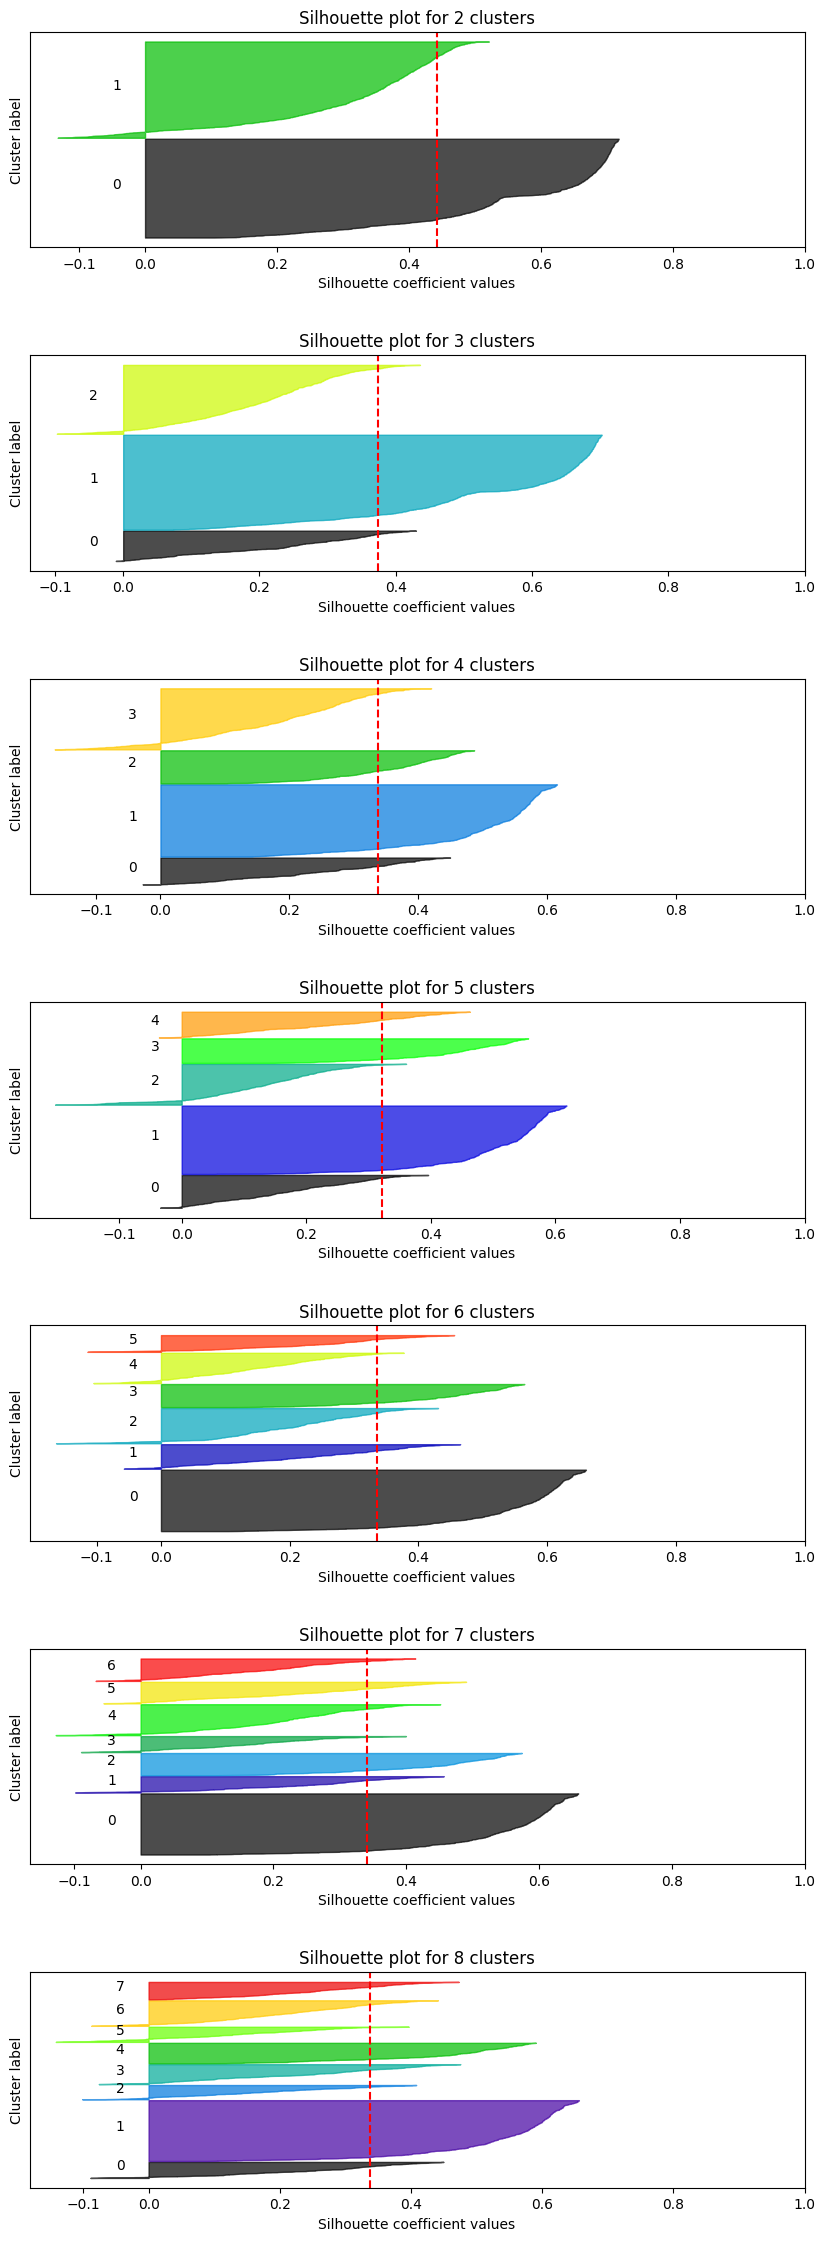

In [109]:
# generate the kmean silhouette plot
# Create subplot grid
range_n_clusters = [2, 3, 4, 5, 6,7,8]
fig, ax = plt.subplots(len(range_n_clusters), 1, figsize=(10, len(range_n_clusters) * 4))

# Add vertical spacing between subplots
plt.subplots_adjust(hspace=0.5)  # Adjust the spacing as needed

for i, n_clusters in enumerate(range_n_clusters):
    # Initialize KMeans with n_clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, init='k-means++')
    cluster_labels = kmeans.fit_predict(df_scaled)

    # Compute silhouette scores
    silhouette_avg = silhouette_score(df_scaled,cluster_labels)
    sample_silhouette_values = silhouette_samples(df_scaled, cluster_labels)

    # Print silhouette score for each cluster
    print(f'Silhouette score for {n_clusters} clusters: {silhouette_avg}')

    y_lower = 10
    for j in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster j
        jth_cluster_silhouette_values = sample_silhouette_values[cluster_labels == j]
        jth_cluster_silhouette_values.sort()

        size_cluster_j = jth_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j

        # Color each cluster silhouette plot
        color = plt.cm.nipy_spectral(float(j) / n_clusters)
        ax[i].fill_betweenx(np.arange(y_lower, y_upper),
                             0, jth_cluster_silhouette_values,
                             facecolor=color, edgecolor=color, alpha=0.7)

        # Label silhouette plots with their cluster numbers at the middle
        ax[i].text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))

        # Compute new y_lower for the next plot
        y_lower = y_upper + 10

    ax[i].set_title(f'Silhouette plot for {n_clusters} clusters')
    ax[i].set_xlabel('Silhouette coefficient values')
    ax[i].set_ylabel('Cluster label')

    # The vertical line for average silhouette score of all the values
    ax[i].axvline(x=silhouette_avg, color="red", linestyle="--")

    ax[i].set_yticks([])
    ax[i].set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

In [110]:
# Using PCA to reduct dimension
pca = PCA(n_components=6)  # Keep 95% variance
pca_result = pca.fit_transform(df_scaled)

In [111]:
#pac explained variance ration
pca.explained_variance_ratio_

array([0.62294913, 0.10603084, 0.09681965, 0.07262911, 0.05667691,
       0.04489436])

In [112]:
pca_result=pd.DataFrame(pca_result)

In [113]:
pca_result.head()

,0,1,2,3,4,5
0,2.491499,0.033338,1.463729,2.254304,0.988800,-0.760582
1,-2.122683,-0.059348,0.391844,-0.424321,0.445404,0.462175
2,2.105510,0.406170,-0.797011,0.102172,-0.541342,0.511973
3,-2.100509,0.262292,0.161412,-0.085907,-0.354022,-0.277353
4,-0.200588,0.924545,0.465073,-0.074246,-0.145391,0.549721


In [114]:
# k means
k=2
kmeans = KMeans(n_clusters=k, random_state=0)
k_cluster= kmeans.fit_predict(pca_result)
centroids = kmeans.cluster_centers_

In [115]:
print('Cluster labels:', k_cluster)
print('Centroids', kmeans.cluster_centers_)

Cluster labels: [1 0 1 ... 1 1 0]
Centroids [[-1.71776199e+00  7.48707206e-04  2.46484301e-02  3.69172847e-03
   3.11917736e-03 -1.91547448e-02]
 [ 1.76924804e+00 -7.71148022e-04 -2.53872114e-02 -3.80237973e-03
  -3.21266769e-03  1.97288652e-02]]


In [116]:
# Interpretation
for i, centroid in enumerate(centroids):
    print(f"Cluster {i} centroid:", centroid)


for i, label in enumerate(k_cluster):
    print(f"Data point {i} belongs to cluster {label}")

Cluster 0 centroid: [-1.71776199e+00  7.48707206e-04  2.46484301e-02  3.69172847e-03
  3.11917736e-03 -1.91547448e-02]
Cluster 1 centroid: [ 1.76924804e+00 -7.71148022e-04 -2.53872114e-02 -3.80237973e-03
 -3.21266769e-03  1.97288652e-02]
Data point 0 belongs to cluster 1
Data point 1 belongs to cluster 0
Data point 2 belongs to cluster 1
Data point 3 belongs to cluster 0
Data point 4 belongs to cluster 0
Data point 5 belongs to cluster 1
Data point 6 belongs to cluster 1
Data point 7 belongs to cluster 0
Data point 8 belongs to cluster 0
Data point 9 belongs to cluster 0
Data point 10 belongs to cluster 0
Data point 11 belongs to cluster 0
Data point 12 belongs to cluster 1
Data point 13 belongs to cluster 0
Data point 14 belongs to cluster 0
Data point 15 belongs to cluster 1
Data point 16 belongs to cluster 0
Data point 17 belongs to cluster 0
Data point 18 belongs to cluster 1
Data point 19 belongs to cluster 0
Data point 20 belongs to cluster 0
Data point 21 belongs to cluster 0
Da

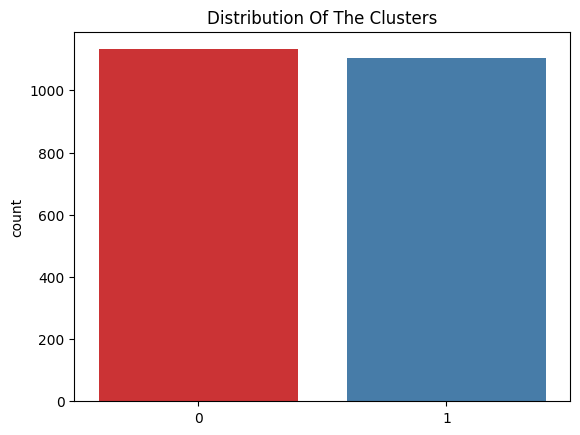

In [117]:
ClustersCt = sns.countplot(x=k_cluster, palette= pal)
ClustersCt.set_title("Distribution Of The Clusters")
plt.show()

In [141]:
pca_result.head()

,0,1,2,3,4,5
0,2.491499,0.033338,1.463729,2.254304,0.988800,-0.760582
1,-2.122683,-0.059348,0.391844,-0.424321,0.445404,0.462175
2,2.105510,0.406170,-0.797011,0.102172,-0.541342,0.511973
3,-2.100509,0.262292,0.161412,-0.085907,-0.354022,-0.277353
4,-0.200588,0.924545,0.465073,-0.074246,-0.145391,0.549721


In [143]:
columns = df_scaled.columns.tolist()  # using original column name

# create new df with original column
df1 = pd.DataFrame(df_scaled).copy()
df1['Cluster_Labels'] = cluster_labels

# caculation each cluster mean
cluster_means = df1.groupby('Cluster_Labels').mean()

# Compare the difference cluster
cluster_diff = cluster_means.diff().abs().sum()  # caculate diff between two mean

# print resule
print("Cluster Feature Importance:")
print(cluster_diff)

Cluster Feature Importance:
Income               7.524223
Kidhome              2.232965
MntWines             9.981503
MntMeatProducts      9.373598
NumWebPurchases      8.112603
NumStorePurchases    8.545267
dtype: float64


In [118]:
k_cluster_df = pd.DataFrame(k_cluster, columns=['ClusterLabel'])

In [121]:
merged_df = pd.concat([numerical_df, k_cluster_df], axis=1)

print(merged_df.head())

    Income  Kidhome  MntWines  MntMeatProducts  NumWebPurchases  \
0  58138.0      0.0     635.0            546.0              8.0   
1  46344.0      1.0      11.0              6.0              1.0   
2  71613.0      0.0     426.0            127.0              8.0   
3  26646.0      1.0      11.0             20.0              2.0   
4  58293.0      1.0     173.0            118.0              5.0   

   NumStorePurchases  ClusterLabel  
0                4.0           1.0  
1                2.0           0.0  
2               10.0           1.0  
3                4.0           0.0  
4                6.0           0.0  


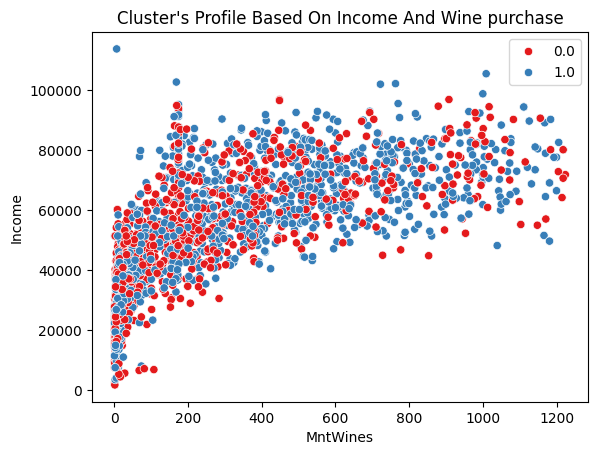

In [127]:
pl = sns.scatterplot(data = merged_df,x="MntWines", y="Income",hue="ClusterLabel", palette= pal)
pl.set_title("Cluster's Profile Based On Income And Wine purchase")
plt.legend()
plt.show()

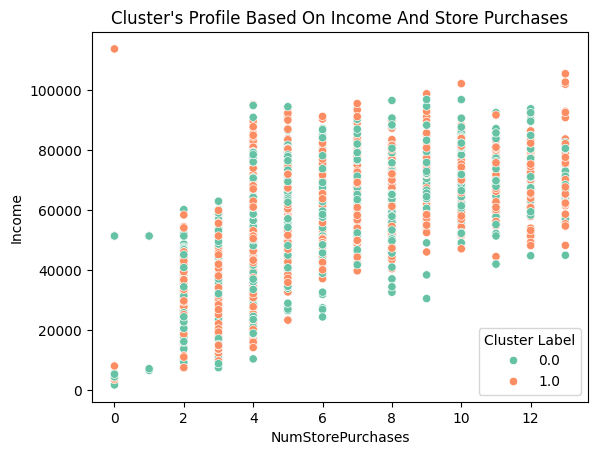

In [135]:
pal = sns.color_palette("Set2")
pl = sns.scatterplot(data=merged_df, x="NumStorePurchases", y="Income", hue="ClusterLabel", palette=pal)
pl.set_title("Cluster's Profile Based On Income And Store Purchases")
plt.legend(title='Cluster Label')
plt.show()

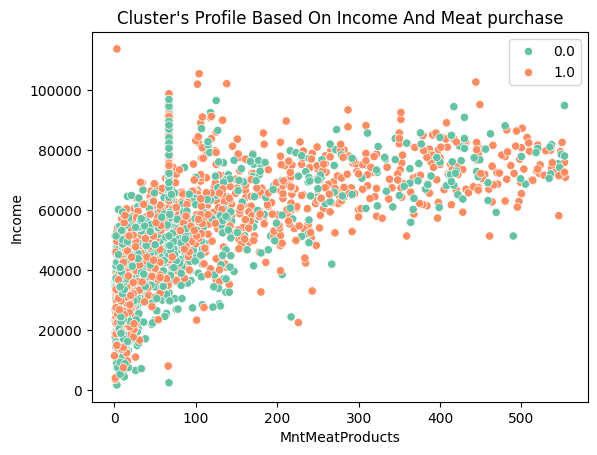

In [136]:
pl = sns.scatterplot(data = merged_df,x="MntMeatProducts", y="Income",hue="ClusterLabel", palette= pal)
pl.set_title("Cluster's Profile Based On Income And Meat purchase")
plt.legend()
plt.show()

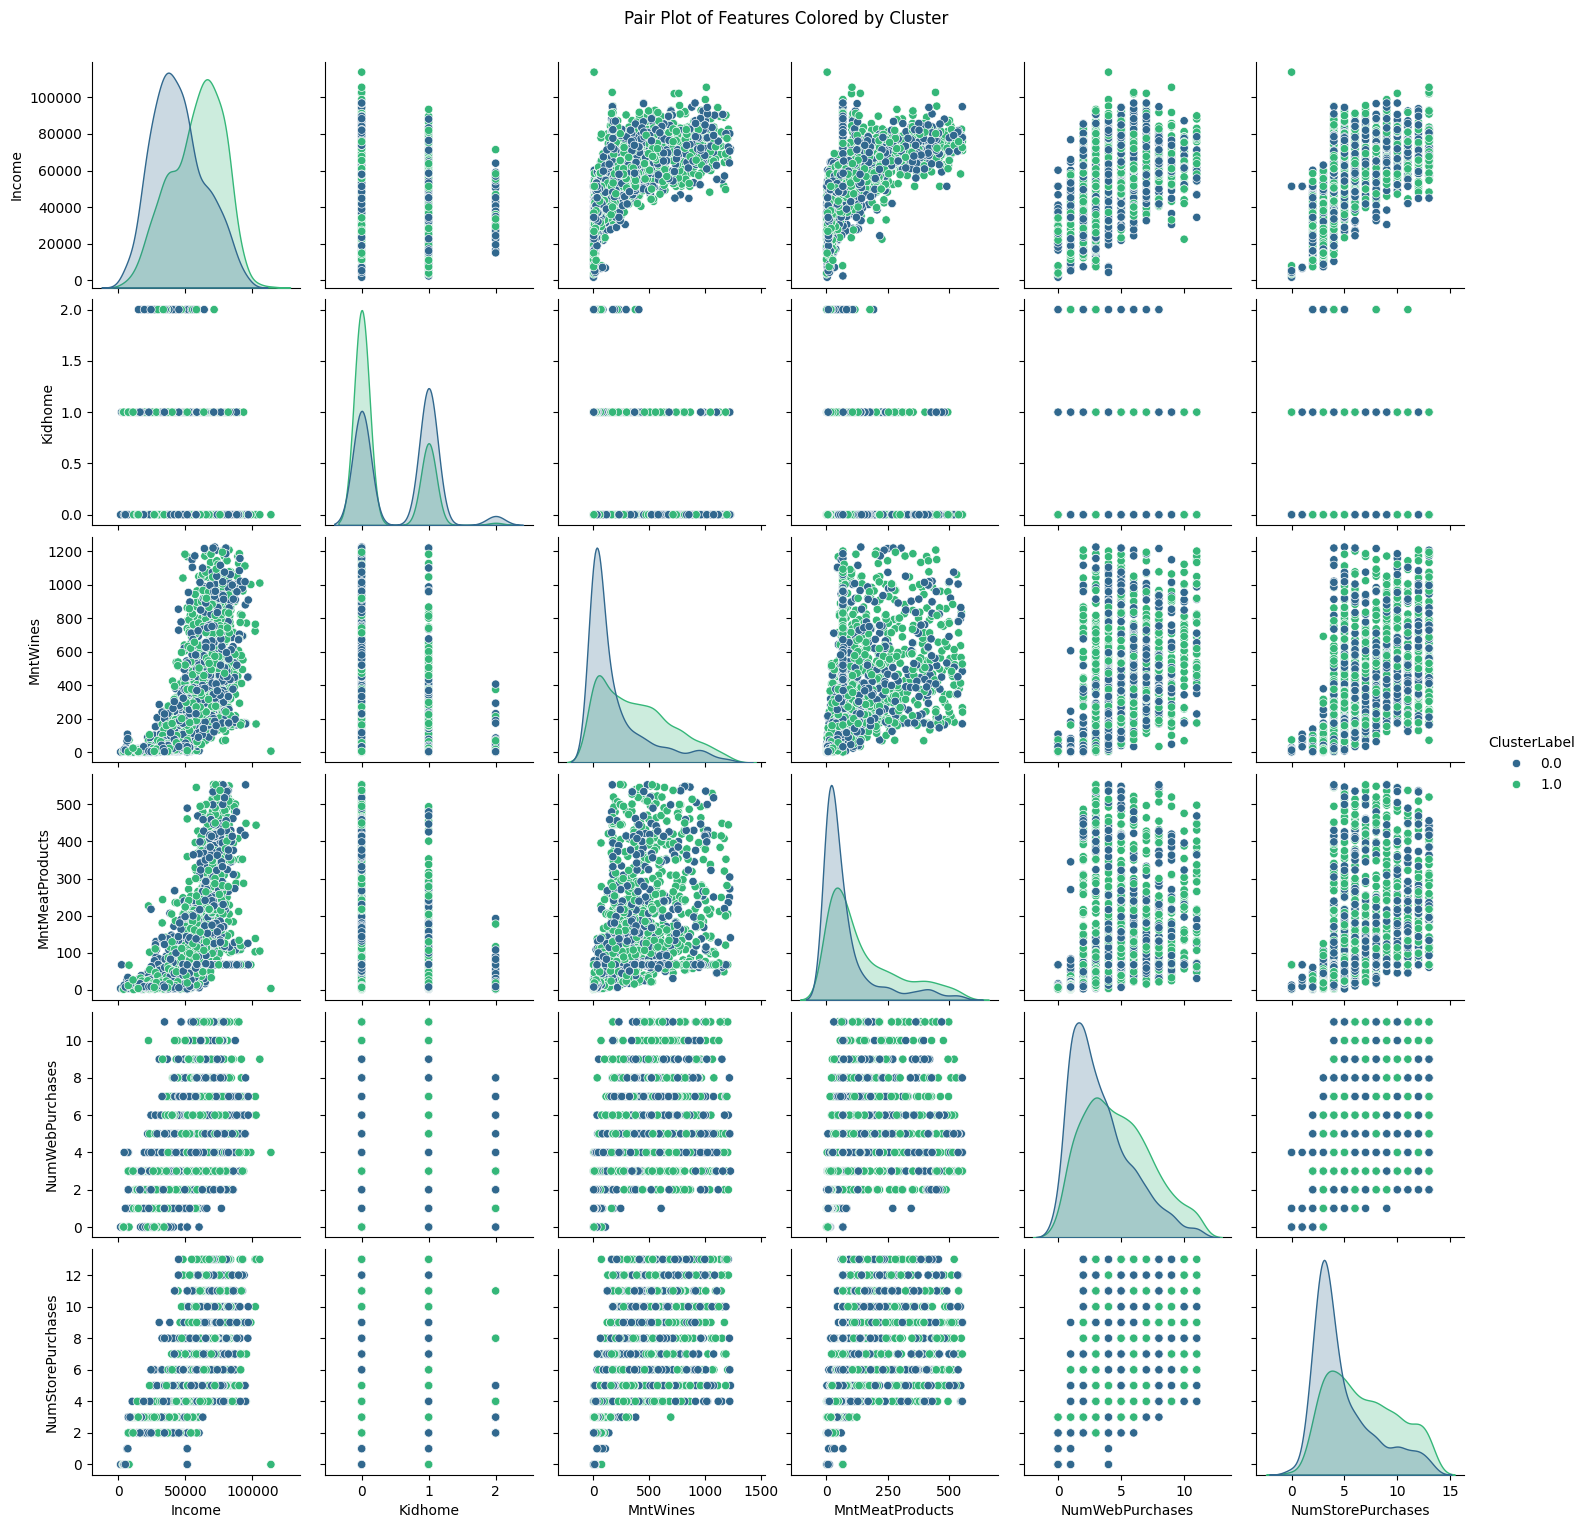

In [144]:
# Pair Plot
sns.pairplot(merged_df, hue='ClusterLabel', palette='viridis')
plt.suptitle("Pair Plot of Features Colored by Cluster", y=1.02)
plt.show()

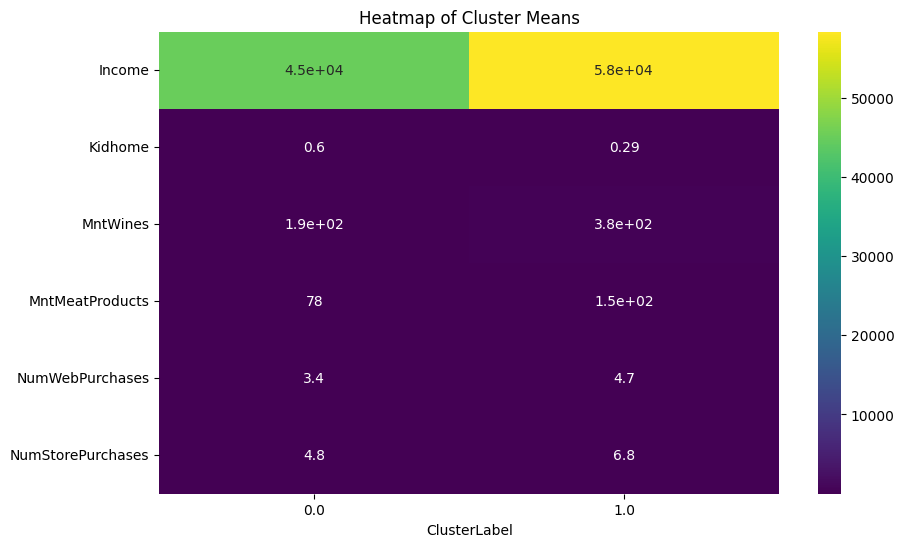

In [148]:
# Calculate cluster means again if not already done
cluster_means = merged_df.groupby('ClusterLabel').mean()

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means.T, annot=True, cmap='viridis')
plt.title("Heatmap of Cluster Means")
plt.show()


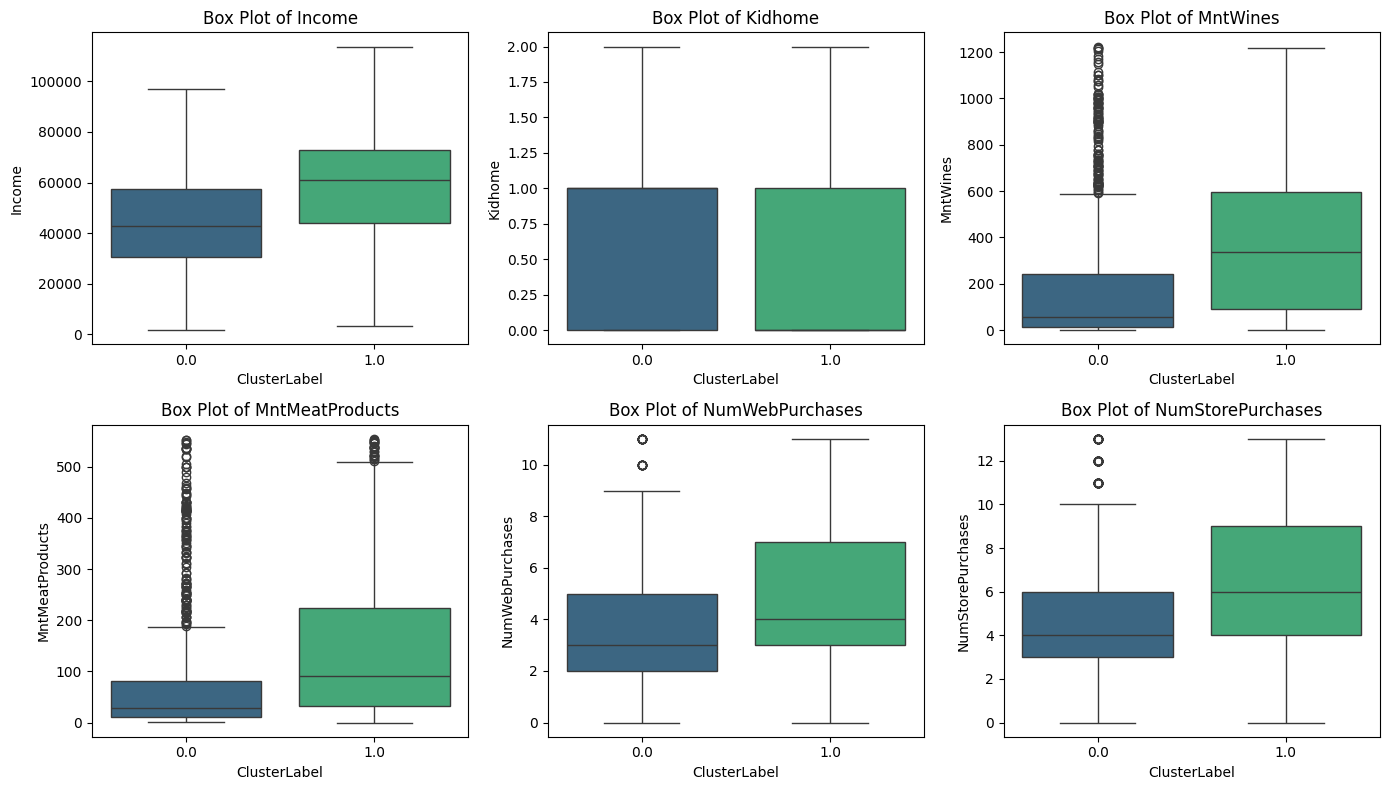

In [149]:
# Box Plot for each feature
features = ['Income', 'Kidhome', 'MntWines', 'MntMeatProducts', 'NumWebPurchases', 'NumStorePurchases']

plt.figure(figsize=(14, 8))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='ClusterLabel', y=feature, data=merged_df, palette='viridis')
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()


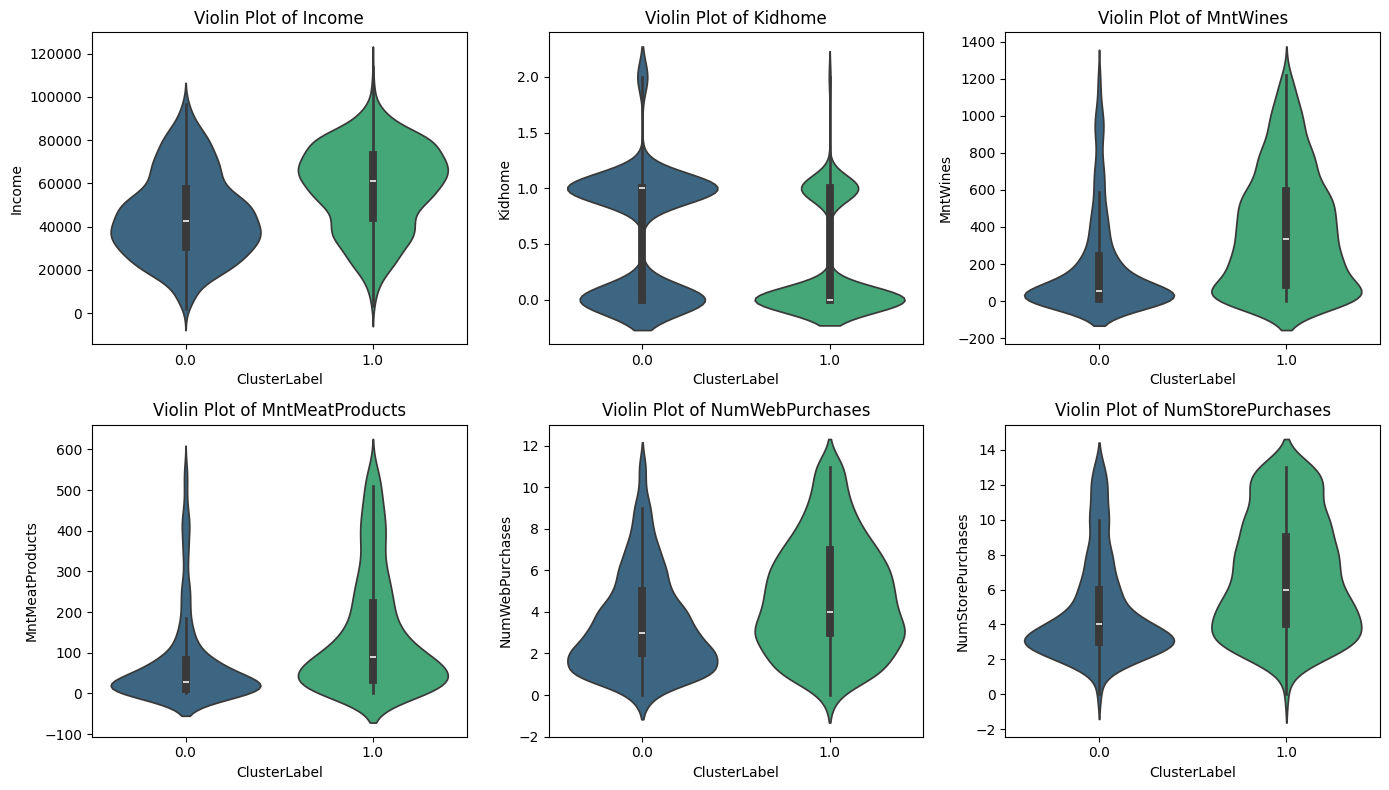

In [150]:
# Violin Plot for each feature
plt.figure(figsize=(14, 8))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.violinplot(x='ClusterLabel', y=feature, data=merged_df, palette='viridis')
    plt.title(f'Violin Plot of {feature}')
plt.tight_layout()
plt.show()
